<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_6/student_teacher_dist.png" height="300" width="600"> 

# <center> R для тервера и матстата. <br>  <br> Домашка номер четыре </center>


Данный ноутбук является домашкой по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/r_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

----------------------


Приветствую вас внутри четвёртой домашки. __Краткий брифинг:__

* __Дедлайн: 10.07.19__
* Эта домашка про проверку гипотез
* В каждой задачке нужно чётко обосновывать какой критерий вы используете, выписывать какую гипотезу вы проверяете, и какие предпосылки для этого должны быть выполнены. Если этого не сделано, буду снимать баллы. 
* На забывайте тестировать предпосылки. То есть это означает, что __если вы руководствуетесь предпосылкой о нормальности выборки, эту предпосылку надо проверить.__
* Не забывайте держать уровень значимости под контролем. 

---------------------------

* __Как оформлять домашки:__ 
    1. Компьютерные домашки оформляем либо в связке R + LaTeX, либо в юпитерских тетрадках (если хочется новых технологий), либо в связке R + Markdown. Все шаблоны для этого есть в репозитории. Пожалуйста, не нужно присылать мне просто тупой код с выводами в виде комментариев, написанных через решёточки. Я от этого могу сойти с ума. 
    2. Ручные решение можно оформлять двумя способами: либо вбивать их в файл вместе с кодом. Благо в Markdown, юпитере и других местах поддерживаются теховские формулу. Либо аккуратно оформляйте их на бумаге и присылайте свёрстанную pdf-ку. Не надо кидать мне фотки по одной. Я от этого тоже сойду с ума. Вариант с вбиванием в основной файл - предпочтительнее. Заодно попрактикуетесь в формулах для LaTeX. 
    
* На странице курса висит [видео-инструкция по оформлению.](https://yadi.sk/i/Pxp_pByP6Em9-A)

---------------------------

Ближе к делу. С чего начинается любой скрипт? Правильно! С подгрузки пакетов :) 

In [7]:
library('maxLik') # пакет для метода макс. правдоподобия
library('dplyr')  # пакет для работы с таблицами 
library('rio')

library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

Попробуйте самостоятельно реализовывать все критерии в виде функций. На вход в эти функции должны попадать данные, на выходе должны оказываться разные полезности и результаты. Например, вот так можно было бы попробовать написать критерий для проверки гипотезы о доли. 

In [4]:
z.prop = function(m, n, p0, alpha=0.05, alternative="two-sided"){
  
  p_hat = m/n                       # оценка вероятности 
  sd_p = sqrt(p_hat*(1-p_hat)/n)    # дисперсия оценки
  z_stat = (p_hat - p0)/sd_p        # наблюдаемое значение

  # В зависимости от типа альтернативы делаем расчёты
  if(alternative == 'two-sided'){
      p_val <- 2*pnorm(-abs(z_stat))
      z_crit <- qnorm(1-alpha/2)
  }
  if(alternative == 'lower'){
      p_val <- pnorm(-abs(z_stat))
      z_crit <- qnorm(alpha)
  }
  if(alternative == 'greater'){
      p_val <- 1 - pnorm(abs(z_stat))
      z_crit <- qnorm(1-alpha/2)
  }
    
  # Возвращаем результаты проверки гипотезы в виде списка
  return( list(estimate = p_hat, 
               z_crit = z_crit,
               z_stat = z_stat,
               p_val = p_val,
               alternative = alternative))
}

# вот так можно к чему-нибудь применить функцию 
result <- z.prop(52, 100, 0.5, alpha=0.01, alternative = 'greater')

result  # вот так можно посмотреть на всё, что мы в неё запихнули

$estimate
[1] 0.52

$z_crit
[1] 2.575829

$z_stat
[1] 0.4003204

$p_val
[1] 0.3444603

$alternative
[1] "greater"

In [5]:
result$p_val # можно по именам из листа доставать разные циферки :3

[1] 0.3444603

Если кишка тонка писать свои функции, пользуйтесь готовыми. Но имейте в виду, что не все критерии, которые понадобятся вам в этой тетрадке, реализованы в R в виде одной команды. 

Если есть желание, можете снабдить выдачу картинками. В [тетрадке с лекции](https://nbviewer.jupyter.org/github/FUlyankin/r_probability/blob/master/end_seminars_2019/sem_6/6.%20Гипотезы%20о%20долях%2C%20средних%20и%20дисперсиях.ipynb) для этого написано несколько функций. Вы можете усовершенствовать их. Не путайте картинки местами! Например, не вздумайте использовать картинку для нормального распределения для t-критерия! Если код в ggplot кажется вам тяжёлым, можете попробовать рисовать картинки, [как во втором ответе тут.](https://stackoverflow.com/questions/36508020/can-r-visualize-the-t-test-or-other-hypothesis-test-results)

# Рыбёшки 

### [2] Задачка 1 

В одном из выпусков программы "Разрушители легенд" проверялось, действительно ли заразительна зевота. В эксперименте участвовало $50$ испытуемых. Каждый из них разговаривал с рекрутером; в конце $34$ из $50$ бесед рекрутер зевал. Затем испытуемых просили подождать решения рекрутера в соседней пустой комнате.

Во время ожидания $10$ из $34$ испытуемых экспериментальной группы и $4$ из $16$ испытуемых контрольной начали зевать. Таким образом, разница в доле зевающих людей в этих двух группах составила примерно $4.4\%$. Ведущие заключили, что миф о заразительности зевоты подтверждён.

Можно ли утверждать, что доли зевающих в контрольной и экспериментальной группах отличаются статистически значимо? Посчитайте достигаемый уровень значимости ($p-$значение) при альтернативе заразительности зевоты.

In [ ]:
# Ваш код

### [2] Задачка 2

Ежегодно более $200000$ людей по всему миру сдают стандартизированный экзамен GMAT при поступлении на программы MBA. Средний результат составляет $525$ баллов, стандартное отклонение — $100$ баллов.

Сто студентов закончили специальные подготовительные курсы и сдали экзамен. Средний полученный ими балл — $541.4$. Проверьте гипотезу о неэффективности программы против односторонней альтернативы о том, что программа работает. Отвергается ли на уровне значимости $0.05$ нулевая гипотеза? 

In [ ]:
# Ваш код

### [3] Задачка 3

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года [Осьминог Пауль](https://ru.wikipedia.org/wiki/Пауль_(осьминог))занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в $12$ случаях из $14$. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14? 

In [ ]:
# НЕ НАДО НИЧЕГО ТУТ ГЕНЕРИРОВАТЬ! ПРОСТО ПОСЧИТАЙТЕ! 

Можно ли утверждать, что Осьминог обладает даром предвидения? Каким получилось p-значение? 

In [ ]:
# Ваш код

### [4] Задачка 4

Новый корм для котиков рекламируется с помощью рекламного баннера. Отдел маркетинга разработал для рекламы новый баннер. Они считают, что он более красивый. Перед фирмой возникла необходимость проверить какой из двух баннеров лучше. 

Для этого была создана специальная веб-форма. В этой веб-форме людям по очереди демонстрировали оба баннера и просили поставить лайк, если баннер нравится человеку. Если человеку нравятся оба баннера, он может поставить два лайка. Если ему не нравится ни один баннер, он может не ставить лайки вовсе. Собранные в конечном итоге данные находятся в [табличке.](https://yadi.sk/i/9Z5N-6PM3XN8on)

Можно ли утверждать, что оба баннера одинаково хороши? Не забудьте найти p-значение.

In [ ]:
df = read.csv('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/banner_click_stat.csv', sep='\t', header = FALSE)
names(df) = c('banner_a', 'banner_b')
head(df)

In [ ]:
# Ваш код

Как думаете, какие у этого экперимента могли быть проблемы в плане его дизайна? 

In [ ]:
# Ваши мысли

### [4] Задачка 5

Оборудование часто грешит и работает криво. Для каждого станка есть своя допустимая степень кривизны. Например, [в табличке](https://yadi.sk/i/bsjOHeOO3XaTN9) `gear.csv` лежат данные о производстве шестерёнок на станке. Первая колонка это диаметр, произведённой шестерни. Вторая колонка это то, к какой серии относится шестерня. 

Ясное дело, что станок не всегда делает диаметр равным $1$. У него есть некоторая погрешность. Будем считать, что станок годный, если дисперсия диаметра выпускаемых им шестерёнок не превышает $0.01$. Правда ли, что станок годный?

In [40]:
df = import('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/gear.csv')
head(df)

DIAMETER,BATCH
1.006,1
0.996,1
0.998,1
1.000,1
0.992,1
0.993,1


In [ ]:
# Ваш код

Станок из задачки произвёл по очереди $10$ батчей из деталей. Понятное дело, что со временем со станком могут происходить проблемы, погрешность работы может искажаться, и из-за этого возникает необходимость подкрутить его. 

In [33]:
unique(df$BATCH)

[1]  1  2  3  4  5  6  7  8  9 10

Чтобы понимать, когда подкручивать, на станок нужно настроить какой-то тригер, который будет в случае чего срабатывать и требовать дополнительной проверки станка. Опишите, какую процедуру вы бы для этого использовали. Правда ли, что для $10$ батчей, которые произвёл станок, наш алерт ни разу не сработает? 

In [ ]:
# Ваш код

### [4] Задачка 6

Эконооооом. [В табличке](https://yadi.sk/d/uT47H5783Xq4jM) `ekanam_data.csv` лежат данные про эконоооооом. [В вспомогательнй табличке](https://yadi.sk/d/MnJnluID3Xq4oL) лежит описание переменных из таблички про эконооооом. Нас будет интересовать не вся таблица, а вполне конкретные столбцы. 

В столбце `year` лежит год набора. В столбце `kozko` лежит массив из нулей и единиц. Единица означает, что лектором по матану был Козко. В столбце `target_1` лежит единичка, если человек дожил до конца первого курса. В столбце `target_2` лежит единица, если человек дожил до конца второго курса. 

In [41]:
df = import('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/2019/ekanam_data.csv')
head(df)

year,prohodnoy,lgota,chelevoe,olimp,dogovor,ochko-zaochka,kurs,zima,leto,⋯,30pub_clust_21,30pub_clust_22,30pub_clust_23,30pub_clust_24,30pub_clust_25,30pub_clust_26,30pub_clust_27,30pub_clust_28,30pub_clust_29,pub_likes_cnt
2012,247,0,0,1,0,0,5,0,0,⋯,0.002063675,0.02963645,0.0014059704,0.0021747033,0.09210429,0.009421746,0.005366837,0.08721616,0.0006871135,16
2012,247,0,0,1,0,0,5,0,0,⋯,0.034113219,0.04006099,0.0074222157,0.0019801837,0.02033590,0.005578764,0.006944536,0.04630750,0.0004495845,3
2012,247,0,0,1,0,0,5,0,0,⋯,0.024249456,0.03723640,0.0010818390,0.0041062428,0.09214286,0.006559478,0.018943973,0.04310553,0.0000000000,66
2012,247,1,0,0,0,0,1,0,1,⋯,0.015666752,0.01476522,0.0000000000,0.0000000000,0.10734050,0.001523200,0.043704440,0.01338805,0.0179090897,0
2012,247,1,0,0,0,0,2,1,0,⋯,0.017459158,0.01146120,0.0006298577,0.0006298577,0.00478961,0.017663595,0.021905194,0.05992046,0.0006298577,14
2012,247,1,0,0,0,0,2,1,0,⋯,0.000000000,0.02219519,0.0000000000,0.0000000000,0.03107851,0.006224493,0.017723031,0.11494936,0.0000000000,5


Поговаривают, что Козко тот ещё зверь. Испокон веков, среди студентов эконома ходит миф, что когда матан читает Козко, с первого курса отчисляют больше людей. Когда матан читает Чирский, людей отчисляют меньше. Проверьте гипотезу о том, что при Козко с первого курса отчисляют больше людей. 

In [ ]:
# Ваш код 

Проверьте гипотезу о том, что с первых двух курсов при Козко отчисляют больше людей, чем при Чирском.

In [ ]:
# Ваш код

Сделайте парочку осмысленных и глубоких выводов о том, что вы узнали выше. Как думаете, корректно ли мы проверяем эту гипотезу или что-то мы делаем не так? 

In [ ]:
# Ваши мысли

Подумайте, какие ещё интересные гипотезы можно было бы проверить по экономовскому датасету. Проверьте их. 

In [ ]:
# Ваш код и мысли

### [5] [Задачка 7](https://nplus1.ru/news/2018/05/11/mice-trolley?utm_source=Telegram&utm_medium=Social) 

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с 20-секундным таймером: участникам сообщили, что по истечении этих 20 секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей; следует, однако, уточнить, что удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только 12 участников). В решении реальной проблемы вагонетки приняли участие 192 человека, а еще 83 решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

[В таблице](https://yadi.sk/i/ISGOdtr43Xq7bp) `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* STUDY: какую проблему вагонетки решал человек 1 если реальную, 2 если на бумаге
* AGE: возраст респондента 
* GENDER: пол респондента
* DECISION: решение дилеммы (1 - жать на кнопу, 0 - не жать) 
* RT: время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили кучу логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Этому добру вас будут учить на эконометрике, мы пойдём простым и не совсем правильным путём и будем проверять гипотезы в лоб. 

In [42]:
df = import('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/2019/mouse.csv')
df = df[c('STUDY', 'AGE', 'GENDER', 'RT')]
head(df)

STUDY,AGE,GENDER,RT
1,38,1,NA
1,22,1,NA
1,39,1,NA
1,21,0,9.212427
1,20,0,17.071711
1,21,1,9.827884


Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чащи принимают решение нажать кнопку: в реальной или на бумаге?

In [ ]:
# Ваш код 

Правда ли, что женщины и мужчины принимают решению о нажатии на кнопку одинаково часто? А на бумаге?

In [ ]:
# Ваш код

Правда ли, что женщины намного кровожаднее мужчин и жмут на кнопку гораздо быстрее?

In [ ]:
# Ваш код

Правда ли, что дисперсия времени для женщин равна дисперсии времени для мужчин? 

In [ ]:
# Ваш код

Можем ли мы воспользоваться информацией о равенсве дисперсий для теста на равенство средних? Нужно ли делать коррекцию для уровня значимости? Если да, воспользуйтесь! 

In [ ]:
# Ваш код

Все гипотезы тестируйте на уровне значимости $0.05$, не забывайте выводить $p$-значения. Кстати говоря, обратите внимание, что слово Задачка выделено синим. Это гиперссылка на статью на N+1. 

<img src="https://pp.userapi.com/c852220/v852220032/14dce1/r1zXBIig4B8.jpg" height="300" width="600"> 

### [5] Задачка 8 

[В таблице youtube_data.csv](https://yadi.sk/d/z-dq9EEu54mWgg) лежит куча информации по музыкальным клипам с youtube. По разным жанрам и исполнителям. Данные скачивались в марте $2019$ года. Нас будут интересовать два столбца. В столбце `music_style` находится информация о том, к какому музыкальному стилю относитмя клип. В колонке `comment_negative_share` находится доля негативных комментов, оставленных под клипом. Является ли коммент негативным определялось с помощью специального сентимент-классификатора, обученного на заранее приготовленной размеченной выборке. 

In [9]:
df = import('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/2019/youtube_data.csv')
df = df[c('music_style', 'comment_negative_share')]
head(df)

music_style,comment_negative_share
popsa,0.4800000
popsa,NA
popsa,0.7500000
popsa,0.7272727
popsa,0.4411765
popsa,0.4285714


Правда ли, что под рэпом негативных комментов больше, чем под всеми остальными жанрами? Чётко обоснуйте критерий, который вы будете использовать для проверки гипотезы. 

In [ ]:
# Ваш код 

### [5] Задачка 9

28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" [известны температура воздуха и появление повреждений](https://yadi.sk/i/yuX1AQ-khApwvw) хотя бы у одного из уплотнительных колец.

In [10]:
df = import('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/2019/challenger.txt')
head(df)

V1,Temperature,Incident
Apr12.81,18.9,0
Nov12.81,21.1,1
Mar22.82,20.6,0
Nov11.82,20.0,0
Apr04.83,19.4,0
Jun18.83,22.2,0


С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница?

In [ ]:
# Ваш код 

### [30 бонусных баллов для байесовцев и любителей максимального правдоподобия (кровь и пот)]

Судя по всему, между температурой и вероятностью поломки есть какая-то взаимосвязь. Давайте попробуем замоделировать её. Например, с помощью метода максимального правдоподобия. Скорее всего, чем выше температура, тем выше вероятность поломки. 

Пусть вероятность поломки зависит от температуры экспоненциально: 

$$
p(t) = \frac{1}{1 + e^{\alpha + \beta t}}
$$

Почему именно так? Давайте попробуем порассуждать. Для начала посмотрим как выглядит такая функция. Она напоминает букву $S$. 

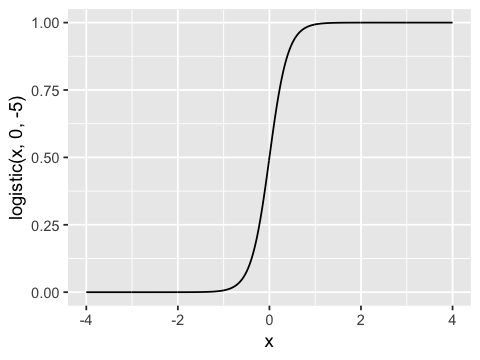

In [18]:
logistic = function(x, alpha, beta){
    return(1/(1 + exp(alpha + beta*x)))
}

x = seq(-4,4,0.01)
qplot(x, logistic(x, 0, -5), geom='line')

Уплотнитель повреждается при нагревании после набора какой-то критической температуры. Значит вероятность поломки будет сначала близка к нулю, потом резко подскочит и за довольно небольшой отрезок в температуре окажестя близка к единице. Выбранная нами для описания зависимости функция описывает такой переход. При этом коэффициент $\beta$ отвечает за то, насколько этот переход будет резким. Коэффициент $\alpha$ будет сдвигать нашу кривую вдоль оси $x$ и говорить, начиная с какой температуры происходит накопление вероятности поломки. Попробуйте поменять выше в коде эти параметры и посмотреть что происходит с картинкой. 

Оказывается, что довольно многие эффекты в природе можно описать таким накоплением. В том числе и в экономике. Например, когда семья решает купить ей машину или нет, ориентируясь на свои накопления, вероятность покупки находится около нуля при маленьком бюджете, и в районе какого-то определённого уровня подскакивает до единицы по подобной кривой. 

Функция, которую мы выписали выше, назывется сигмоидой, а подобная модель для моделирования зависимости вероятности события от каких-то факторов, называется логистической регрессией. 

__[10]__ Удалите из данных день катастрофы. Оцените коэффициенты $\alpha$ и $\beta$ методом максимального правдоподобия. Правда ли, что коэффициенты отличаются от нуля? Какова вероятность катастрофы?

In [ ]:
# Ваш код

__[20]__ Предположите на $\alpha$ и $\beta$ какие-нибудь априорные распределения. С помощью STAN найдите апостериорные распределения для коэффициентов. Какова вероятность того, что коэффициенты больше нуля? Какова вероятность катастрофы? 

In [ ]:
# Ваш код

### [10] Задачка 10

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её не грех репостнуть на стеночку. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она буде репостнута повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы репостить. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

Гипотеза сформулирована. Глаза загорелись. Пришло время проверить её. В [табличке df_vk_wise](https://yadi.sk/i/Dx5hDwkW3XN2Ni) лежат даныне о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке I находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено и будем работать с остатками. 

In [46]:
df = import('/Users/fulyankin/Yandex.Disk.localized/R/R_prob_data/df_vk_wise.csv')
df = df[51:nrow(df),]
head(df)

,V1,likes,reposts,text,I
51,50,549,25,"Я, говорит, люблю человечество, но дивлюсь на себя самого: чем больше я люблю человечество вообще, тем меньше я люблю людей в частности. Достоевский. Братья Карамазовы",TRUE
52,51,607,22,"Нельзя любить то, что я люблю, да ещё так, как я люблю, и вдобавок жить среди людей. Хулио Кортасар. """"Игра в классики""""",TRUE
53,52,914,37,"Если испытываешь по-настоящему глубокое чувство, не стыдись его проявлять. Джон Фаулз. """"Коллекционер""""",FALSE
54,53,989,34,"— Я тебя люблю, — сказал я. — Это пройдет, — ответила она и положила трубку. Юрий Визбор",TRUE
55,54,1229,32,"Он очаровательно рассказывает мне о том, как он меня не любит. Марина Цветаева",FALSE
56,55,940,19,"Дорогая, не забывай, что я из Южной Бразилии. Мы по десять лет сохнем по женщине, которую даже не целовали. Элизабет Гилберт, """"Есть, молиться, любить""""",TRUE


Проверьте гипотезу о равенстве среднего числа репостов под постами с местоимением "Я" и постами без него. Чётко обоснуйте выбор критерия для этих целей. 

In [ ]:
# Ваш код

Предположим, что число репостов имеет распределение Пуассона с интенсивностью $\lambda$. Проверьте с помощью критерия отношения правдоподобия гипотезу о том, что $\lambda = 100$. 

In [ ]:
# Ваш код

Проверьте ту же гипотезу, используя критерий о равенстве средних. Различаются ли результаты? Как думаете, почему?

In [ ]:
# Ваш код

Проверьте гипотезу о том, что интенсивность репостов под постами с лайками совпадает с интенсивностью под постами без лайков. Используйте для этого критерий отношения правдоподобий. 

In [ ]:
# Ваш код

Если вы помните, у распределение Пуассона $E(X) = Var(X) = \lambda$. Это довольно сильное предположение. Каждый раз, когда мы моделируем какой-то процесс с помощью этого распределения, мы неявно предполагаем наличие такого ограничения. Как бы вы протестировали его наличие для наших данных? Опишите алгоритм и реализуйте его. 

In [ ]:
# Ваш код

### [3] Задачка 11 

Вовочка тестирует гипотезу $H_0$ против гипотезы $H_A$. Предположим, что $H_0$ на самом деле верна. По своей сути $p-value$ является случайной величиной. Какое распределение оно имеет? 

__[а]__ Выясните это с помощью симуляций 

__[б]__ Выведите руками

### [3] Задачка 12

В десятичной записи числа $\pi$ среди первых $10002$ знаков после запятой цифры $0, 1, \dots, 9$ встречаются соответственно $968, 1026, 1021, 974, 1014, 1046, 1021, 970, 948, 1014$ раз. Можно ли при уровне значимости $0.05$ считать эти цифры случайными? При каком уровне значимости эта гипотеза отвергается? Чётко обоснуйте выбор критерия для теста гипотезы. 

### [5] Задачка 13

Давйте возьмём [данные о числе аварий на шахтах](https://yadi.sk/i/wIFZJJ3X3VdPow) из cеминара по максимальному правдоподобию. Постройте для этой случайной величины эмпирическую функцию распределения и нормальный асимптотический доверительный интервал для неё. Нарисуйте функцию и доверительный интервал на графике. 

In [ ]:
# Ваш код

### [2] Задачка 14

Когда мы обсуждали критерии согласия, мы с вами сказали, что 

$$
\sqrt{n} \cdot \sup_{x \in \mathbb{R}} \mid \hat F_n(x) - F(x) \mid \overset{d}{\to} D,
$$

где случайная величина $D$ имеет распределение Колмогорова. Давайте попробуем посмотреть на то, как это распределение выглядит. Возьмите какое-нибудь конкретное распределение и на его основе сгенерируйте для статистики Колмогорова выборку размера $10000$. Постройте по этой выборке гистограмму и полюбуйтесь на неё. 

In [ ]:
# ваш код

### [3] Задачка 15

Пришло время возмещать долги. В предыдущих домашках мы довольно часто пренебрегали процедурой проверки гипотезы о том, что конкретная выборка пришла из конкретного распределения. Давайте это исправим.

__[а]__ В табличке [killer.csv](https://yadi.sk/d/AMVdiMELycCAww) лежат данные о том, сколько времени в часах проходило между убийствами, когда эконом играл в киллера (данные взяты из анкеты, куда жертвы вписывали пароли убитых). Правда ли, что эта случайная величина имеет экспоненциальное распределение? 

__[б]__ В [табличке](https://yadi.sk/i/hDxMJ0fw3VSDmu) лежит информация о стоимости квартир в Москве. Правда ли, что цены на квартиры имеют логарифмически нормальное распределение? 

__[в]__ В [табличке](https://yadi.sk/d/hcysIe6d3Uv8rr) лежат данные о рождениях из задачки про парадокс дней рождений. Проверьте гипотезу о том, что распределение рождений по месяцам года имеет равномерное распределение. 

Попробуйте проверять гипотезы разными способами, и смотреть на согласованность критериев. Постарайтесь пояснить, откуда берётся несогласованность, если она есть. 


In [ ]:
# ваш код

### [5] Задачка 16

Среднее и медиана - это две меры, которые характеризуют типичное значение, встречающееся в выборке. Например, представим себе, что на дачу едет компания из $5$ человек. Она едет есть шашлык. Ну и сколько-то килограмм съедает. 

In [3]:
x = c(0.5, 0.7, 0.1, 0.3, 1)
mean(x)
median(x)

[1] 0.52

[1] 0.5

Если мы посчитаем среднее и медиану, они скажут нам о том, какое потребление шашлыка в выборке типично. Иногда так происходит, что в данных встречаются выбросы. Например, в команию может затесаться толстый друг. Он возьмёт и скушает $10$ килограмм. 

In [4]:
x = c(0.5, 0.7, 0.1, 0.3, 10)
mean(x)
median(x)

[1] 2.32

[1] 0.5

Тогда, если мы захотим посчитать для выборки среднее, мы получим довольно большое число, которое не очень адекватно отражает типичное потербление шашлыка на даче. Медиана из-за способа своего расчёта никак не пострадает. Она робастна к выбросам. 

Когда выбросы залезают в выборку, они довольно сильно искажают работу многих алгоритмов. Приходится с ними как-то бороться. Чаще всего это делают разными эвристиками. Например, считают квантиль уровня $1\%$ и квантиль уровня $99\%$, и отрубают всё, что находится за их пределами. 

Мы попробуем немного поупарываться и придумать на основе статистики $\bar x - Med(x)$ какой-нибудь критерий, который мог бы нам помочь ответить на вопросы "А есть ли в выборке выброс?" и "А является ли наблюдение выбросом?". Критические значения для критерия нам придётся получать с помощью бустрапа. Вдохновиться примерами можно попробовать в [статье про выбросы на википедии.](https://en.wikipedia.org/wiki/Outlier) В разделе __Detection__ можно найти несколько простых примеров подобных критериев.

In [ ]:
# Ваш код

###  [10] Задачка 17

Миша решил стать криптотрейдером. Миша хотел бы торговать биткойном. К сожалению, он не знает насколько это рискованно и просит помощи у вас. В [табличке](https://yadi.sk/i/SxvDpAY13VRyoy) лежит динамика стоимости биткойна. Скачайте данные и за последние два-три года постройте несколькими способами оценку для пятипроцентного $VaR$. Найдите $ES$. Проинтерпретируйте эти два показателя. Что всё это значит для Миши?

In [ ]:
# Ваш код

### [10] Задачка 18

Нам с вами доводилось много раз проверять гипотезу о равенстве средних. Для этого мы делали следущие шаги: 

1. Собирали выборки $X_1, \ldots, X_n$ и $Y_1, \ldots, Y_n$;
2. Находили значение статистики

$$
z_{obs} = \frac{\bar x - \bar y}{\sqrt{\frac{s_x^2}{n_x} + \frac{s_y^2}{n_y}}};
$$

3. Говорили, что по ЦПТ $z_{obs} \overset{asy}{\sim} N(0,1);$
4. Находили критическое значение $z_{1 - \frac{\alpha}{2}}$;
5. Если мы видели, что $|z_{obs}| <  z_{1 - \frac{\alpha}{2}}$, мы говорили, что гипотезв не отвергается. 



Ту же самую гипотезу можно попробовать проверить с помощью немного иной процедуры, основанной на доверительных интервалах: 

1. Найдём $\bar x$ и $\bar y$;
2. Пользуясь ЦПТ и зная, что $\bar x \overset{asy}{\sim} N \left(\mu_1,\frac{s^2_x}{n_x} \right)$ и $\bar y \overset{asy}{\sim} N\left(\mu_2,\frac{s^2_y}{n_y}\right)$ построим для $\mu_1$ и $\mu_2$ доверительные интервалы;
3. Если доверительные интервалы пересеклись, говорим, что гипотеза не отвергается. 

Вроде бы вторая процедура выглядит довольно естественно, однако ей никто не пользуется. Дело в том, что для одинаковых ошибок первого рода, $\alpha$, ошибка второго рода, $\beta$, для процедуры, основанной на доверительных интервалах, окажется выше. Давайте для простоты будем дальше предполагать, что $\bar x > \bar y$. Если это не так, просто будем менять обозначения. 

__[а]__ Найдите ошибку второго рода для первой процедуры. Запишите её через функцию распределения стандартной нормальной величины, $\Phi(x)$.

__[б]__ Выпишите доверительный интервал для $\bar x$ и для $\bar y$.  Правая граница интервала для $\bar x$ должна оказаться правее левой границы для $\bar y$. В таком случае гипотеза не отвергается. Выпишите это неравенство. Попытайтесь выразить из него значение $z_{1 - \frac{\alpha}{2}}$. Сравните получившуюся статистку со статистикой из первого пункта. Найдит едля неё ошибку второго рода, запишите её через функцию распределения стандартной нормальной величины, $\Phi(x)$.

__[в]__ Выпишите для обеих процедур функции мощности и сравните их друг с другом. Постройте в R для них графики.

__[г]__ Постройте функции мощности для описанных процедур с помощью симуляций. Сравните их с теоретическими. Сделайте выводы. 

In [ ]:
# ваше решение

In [ ]:
alpha = 0.05

mu1 = 2
mu2 = 3
sigma = 1

range = 100  # сколько точек хотим получить 
begin = 10  # со скольки наблюдений начинаем 
step = 10    # какой шаг делаем 

power1 = rep(0, n)
power2 = rep(0, n)

n_obs = 100
for(i in 1:range){
    p1 = 0 # счётчики для тестов
    p2 = 0 
    for(j in 1: n_obs){
        
        # сгенерировали выборки 
        x = rnorm(begin, mean = mu1, sd=sigma)
        y = rnorm(begin, mean = mu2, sd=sigma)
        
        # проверили гипотезу первым способом 
        z_stat = (mean(y) - mean(x))/(sqrt((var(x) + var(y))/n))
        z_crit = qnorm(1 - alpha/2)
        p1 = p1 + (abs(z_stat) < z_crit)  #  не отвергается => ошибка 
        
        # проверили гипотезу вторым способом (смотрим пересекутся ли интервалы)
        left_x = mean(x) - z_crit*sqrt(var(x)/n)
        right_x = mean(x) + z_crit*sqrt(var(x)/n)
        left_y = mean(y) - z_crit*sqrt(var(y)/n)
        right_y = mean(y) + z_crit*sqrt(var(y)/n)
    
        p2 = p2 + (min(right_y, right_x) - max(left_y, left_x) > 0) # не отвергается => ошибка
        
    }
    
    power1[i] = 1 - p1/n_obs
    power2[i] = p2/n_obs
    begin = begin + step
    
}

In [ ]:
df = data.frame(obs = 1:range, power1 = power1, power2 = power2)
ggplot(df, aes(x = obs)) + 
geom_line(aes(y = power1), col='blue') + geom_line(aes(y = power2), col='red')

In [ ]:
observations = 2:200
power1 = 1 - pnorm(z_crit - (mu2 - mu1)/sqrt(2*sigma/observations))
power2 = 1 - pnorm(2*sqrt(2)*z_crit - (mu2 - mu1)/sqrt(2*sigma/observations))

df = data.frame(obs = observations, power1 = power1, power2 = power2)

ggplot(df, aes(x = obs)) + 
    geom_line(aes(y = power1), col='blue') + 
    geom_line(aes(y = power2), col='red')

### [10] Задачка 19

Ещё одна задачка на мощности! Давайте проведём модельный эксперимент. Сгенерируйте $50$ выборок из нормального распределения $N(1,1)$ и ещё $150$ выборок из нормального распределения $N(0,1)$. Объём выборок должен составить $n$. Для каждой из выборок проверьте гипотезу о равенстве нулю среднего против двусторонней альтернативы с помощью теста Стьюдента. Сделайте это тремя способами.

1. Без корректировки на множественную проверку гипотез 
2. С поправкой Бонфферони 
3. С поправкоф методом Холма 
4. С поправкой методом Бенджамини-Хохберга

Будем считать число неверно отвергнутых (или не отвергнутых гипотез). Дальше под ошибками первого и второго рода имеется в виду именно это. 

__[а]__ Подсчитайте количество ошибок первого и второго рода, которое в среднем совершается при $n=20$ каждой из этих процедур. Где оно оказалось больше?

__[б]__ Постройте для всех трёх при разных $n$ графики с оценками для ошибок первого и второго рода. Какая из процедур оказалась мощнее? 

In [ ]:
# ваше решение

# [бонусные 40] Кит - рисёрчер

### Предыстория 

На дворе стояло 20 октября 1929 года. В этот знаменательный день Чарльз Митчел, председатель Национального Сити Банка Нью-Йорка, сообщил своим акционерам, что промышленность США процветает, финансовая система надёжна, как никогда, а биржа находится в абсолютно здоровом состоянии. В понедельник, 28 октября, Джозеф Патрик Кеннеди, отец будущего президента США Джона Кеннеди, продал свои биржевые активы. Он сделал это настолько своевременно, что впоследствии в трейдинге появилось выражение "Joseph Kennedy Moment", означающее нереально удачное закрытие ставок. Немного позже появилась красивая биржевая легенда, которая объясняла поведение Кеннеди.

Утром 21 октября Джозеф Кеннеди, идя на работу, остановился, чтобы почистить ботинки и подозвал чистильщика обуви. Шустрый мальчуган ловко принялся начищать ботинки миллионера. 

— Мистер, а вы понимаете в биржевой игре? — невзначай спросил мальчик.

— Пожалуй, да, — улыбнулся Старина Джо.

— У меня есть несколько акций железнодорожных компаний. Что посоветуете с ними делать?

— У тебя есть акции? — удивился Кеннеди.

— Да. Отец купил сотню, а я выкупил десяток. Как ими лучше распорядиться? 

Поборов замешательство, Кеннеди посоветовал… Впрочем, его совет от нас скрыт, но для нас важнее другое: невольный совет закончить игру трейдер получил от мальчика, чистившего ему туфли. Изумление Кеннеди от того, что чистильщик обуви является акционером, легко понять — в 20-е годы прошлого века биржа считалась привилегией богатых и могущественных людей. 

Когда Кеннеди понял, что акции появились даже у уличных мальчишек, он понял — грядет нечто ужасное. Уже после биржевого краха Кеннеди сказал: «Таксисты советовали мне какие акции покупать. Мальчишки на улицах делились финансовой повесткой дня. Старый попрошайка перед моим офисом давал мне советы. Подозреваю, что он не пропивал мелочь, что я ему давал, а тратил их на акции! Мой повариха завела себе брокерский счет и тщательно следила за динамикой акций. Впрочем, все её доходы по акциям сдуло во время краха биржи в 1929».

### К чему тут эта история? 

__Гипотеза:__ когда к рынку проявляется излишнее внимание, это приводит к обвалу. Получается, что мы можем попытаться отслеживать всплески этого внимания, и попытаться заработать на них денег. Именно так решили в $2013$ году исследователи из бизнес-школы Уорика, и [написали статью.](https://www.pnas.org/content/pnas/111/32/11600.full.pdf)

Исследователи подумали, что динамика поисковых запросов может быть неплохим инструментом для того, чтобы понимать где именно сосредоточен интерес людей в данный момент. Они взяли индекс S&P 500, взяли динамику поисковых запросов, связанных с биржей, из [Google trends,](https://trends.google.ru/trends/?geo=RU) и начали торговать. Если динамика поиска росла, они продавали бумаги, если падала, покупали. Если бы они действовали по такой стратегии в период между $2004$ и $2012$ годами, им бы удалось увеличили свой гипотетический портфель ценных бумаг на $326\%$. Мы с вами сейчас попробуем воспроизвести подвиг автором, но уже на российском рынке. 



### [20]  Методология 1

Перед тем, как делать выгрузку поисковых запросов, их нужно где-то раздобыть. Мы попробуем поступить двумя способами. Сначала просто воспользуемся здравым смыслом. 

1. Скачайте недельные данные с динамикой индекса РТС откуда угодно. Например, [с финама.](https://www.finam.ru/profile/mirovye-indeksy/rts/tehanalys-light/)
2. В 2008 году был кризис. Если воспользоваться сервисом [Google trends,](https://trends.google.ru/trends/?geo=RU), можно выяснить, что в этот нестабильный момент, по разделам финансовые рынки и страхование интенсивнее всего гуглились следущие $15$ дескрипторов: 

````
банк, курс доллара, евро, ЦБ, РТС, ММВБ, акции, ипотека, взять кредит, ПИФ, банкротство, залог, дефолт, девальвация, финансовый кризис
````

На сайте этого раздела вроде как больше нет, но [интернет](https://yadi.sk/i/T24TXCw2Jzy8oQ) всё помнит, и в нём можно откопать подобную информацию.

3. Заходим на [Google trends,](https://trends.google.ru/trends/?geo=RU) вбиваем эти $15$ дескрипторов, получаем статистику о том, насколько часто эти термины гуглились. Статистика получается в относительных величинах. За $100$ принимается самый мясистый запрос. Скачиваем данные за последние $5$ лет. В силу ограничений от гугла, эти данные окажутся недельными. 

4. У индекса РТС возьмём цену открытия для каждого понедельника, сформируем итоговую табличку. Это можно сделать как вам удобно. Либо в R, либо в excel, либо ещё как-то. 

5. Наши дескрипторы отражают то, насколько люди обеспокоены экономической ситуацией. Следуя этой логике, корреляция между ними и доходностью по индексу РТС должна быть отрицательной. Попробуем сконструировать свою торговую стратегию следующим образом: 

    - Берём конкретный дескриптор. Например, "кризис". Если число запросов по нему выросло, занимает short-позицию. То есть берём в долг одну единицу индекса, и продаём её. Если наши ожидания верны, в следущий момент времени (у нас это через неделю), цена упадёт, и мы сможем выкупить индекс по более низкой цене, и заработать за счёт этого.
    - Если число запросов упало, мы покупаем индекс, через неделю его цена должна вырасти, и мы заработаем, продав его. 
    - В итоге, в результате такой торговли, мы получим для слова "кризис" какую-то доходность. Сделаем это с каждым из дескрипторов, на выходе у нас будет $15$ доходностей. Вопрос в том, насколько сильно ряд этих доходностей отличается от случайных доходностей. 
    - Чтобы выяснить это, давайте сгенерируем $1000$ случайных торговых стратегий. Мы будем каждый понедельник подбрасывать монетку. Если выпал орёл, продаём, а через неделю выкупаем. Если выпала решка, наоборот. Эти стратегии тоже принесут нам какие-то доходности. 
    - У нас есть две выборки. Если они пришли к нам из одного распределения, значит наша торговля на основе "дескрипторов" ничем не отличается от случайной. Нужно проверить гипотезу об однородности выборок. Можно сделать это, например, тестом Вилкоксона. Для него в R есть готовая реализация. 
    
Именно так и поступили исследователи из бизнес-школы Уорика в $2013$ году. Правда их стратегия была чуть сложнее, но об этом мы поговорим ниже. 

In [ ]:
# ваш код для торговли на бирже! 

Честно говоря, я не знаю, будет ли эта стратегия успешной. Что-то мне подсказывает, что должно сработать. Давайте представим, что сработало. Возьмите $15$ рандомных слов. Выгрузите по ним статистику поисковых запросов и повторите всё то же самое. Сравните результаты. 

In [ ]:
# ваш код для торговли на бирже! 

### [20] Методология 2

Пацаны в $2013$ году сделали чуть сложнее. Они не стали выковыривать дескрипторы какими-то ручными способами. Они скачали английскую Википедию и построили на её основе тематическую модель. Скорее всего, вы читали [Иканам Гранд Рисёрч,] и краем уха слышали о такой. 

Ребята оценивали тематическую модель для сотни тем. Для каждой темы они выбрали пул из наиболее вероятных слов, проитнерпретировали эти слова, а дальше начали торговать на их основе. Отличные от случайных доходности, как это не странно, получились для тем, связанных с политикой и бизнесом.

Я пробовал воспроизвести этот результат для России. У меня в загашниках завалялась тематическая модель для $400$ тем, оценённая на российской википедии, а также [выгрузка поисковой статистики] по самым вероятным словам из этих тем. Например, если посмотреть нулевую тему, там можно найти такие дескрипторы, как 

````

````

Судя по всему, эту тему можно проинтерпретировать как 

За бонусные баллы вам предлагается попробовать найти среды выделившихся те темы, которые дают доходности, отличные от случайной и проинтерпретировать их.

In [ ]:
# Ваш код


зарабатывать деньги. 



https://yadi.sk/i/IZ_pUgDb3a6nnd



Тут задача с коэфом спирмэна и зависимостью доходнотей от динамики поисковых запросов 